['hp_metric', 'loss/train_step', 'acc/train_step', 'epoch', 'loss/val_step', 'acc/val_step', 'loss/val_epoch', 'acc/val_epoch', 'loss/train_epoch', 'acc/train_epoch', 'loss/test_step', 'acc/test_step', 'loss/test_epoch', 'acc/test_epoch']
['hp_metric', 'loss/train_step', 'acc/train_step', 'epoch', 'loss/val_step', 'acc/val_step', 'loss/val_epoch', 'acc/val_epoch', 'loss/train_epoch', 'acc/train_epoch', 'loss/test_step', 'acc/test_step', 'loss/test_epoch', 'acc/test_epoch']
['hp_metric', 'loss/train_step', 'acc/train_step', 'epoch', 'loss/val_step', 'acc/val_step', 'loss/val_epoch', 'acc/val_epoch', 'loss/train_epoch', 'acc/train_epoch', 'loss/test_step', 'acc/test_step', 'loss/test_epoch', 'acc/test_epoch']
['hp_metric', 'loss/train_step', 'acc/train_step', 'epoch', 'loss/val_step', 'acc/val_step', 'loss/val_epoch', 'acc/val_epoch', 'loss/train_epoch', 'acc/train_epoch', 'loss/test_step', 'acc/test_step', 'loss/test_epoch', 'acc/test_epoch']


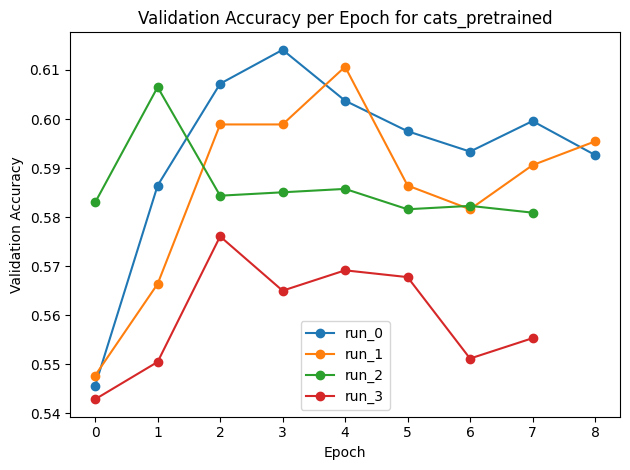

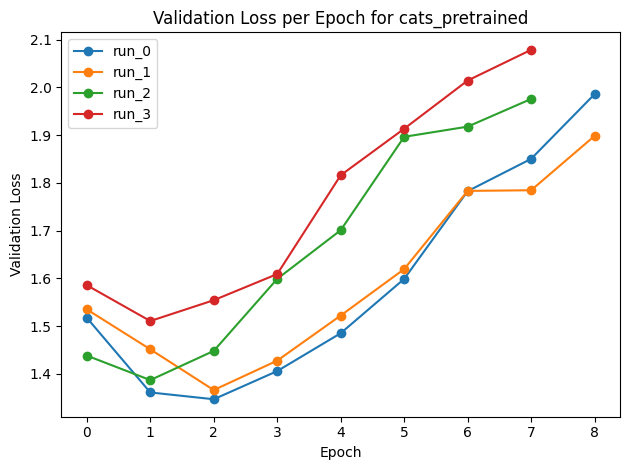

['hp_metric', 'loss/train_step', 'acc/train_step', 'epoch', 'loss/val_step', 'acc/val_step', 'loss/val_epoch', 'acc/val_epoch', 'loss/train_epoch', 'acc/train_epoch', 'loss/test_step', 'acc/test_step', 'loss/test_epoch', 'acc/test_epoch']
['hp_metric', 'loss/train_step', 'acc/train_step', 'epoch', 'loss/val_step', 'acc/val_step', 'loss/val_epoch', 'acc/val_epoch', 'loss/train_epoch', 'acc/train_epoch', 'loss/test_step', 'acc/test_step', 'loss/test_epoch', 'acc/test_epoch']


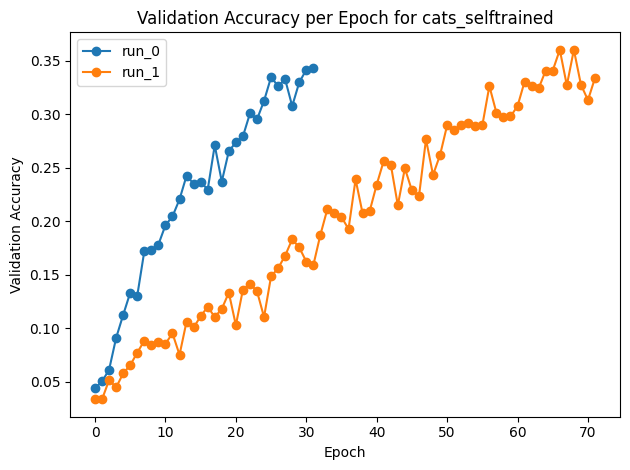

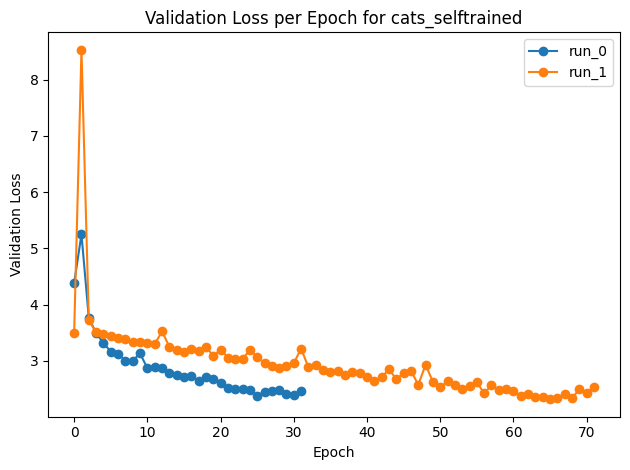

['hp_metric', 'loss/train_step', 'acc/train_step', 'epoch', 'loss/val_step', 'acc/val_step', 'loss/val_epoch', 'acc/val_epoch', 'loss/train_epoch', 'acc/train_epoch', 'loss/test_step', 'acc/test_step', 'loss/test_epoch', 'acc/test_epoch']
['hp_metric', 'loss/train_step', 'acc/train_step', 'epoch', 'loss/val_step', 'acc/val_step', 'loss/val_epoch', 'acc/val_epoch', 'loss/train_epoch', 'acc/train_epoch', 'loss/test_step', 'acc/test_step', 'loss/test_epoch', 'acc/test_epoch']
['hp_metric', 'loss/train_step', 'acc/train_step', 'epoch', 'loss/val_step', 'acc/val_step', 'loss/val_epoch', 'acc/val_epoch', 'loss/train_epoch', 'acc/train_epoch', 'loss/test_step', 'acc/test_step', 'loss/test_epoch', 'acc/test_epoch']
['hp_metric', 'loss/train_step', 'acc/train_step', 'epoch', 'loss/val_step', 'acc/val_step', 'loss/val_epoch', 'acc/val_epoch', 'loss/train_epoch', 'acc/train_epoch', 'loss/test_step', 'acc/test_step', 'loss/test_epoch', 'acc/test_epoch']


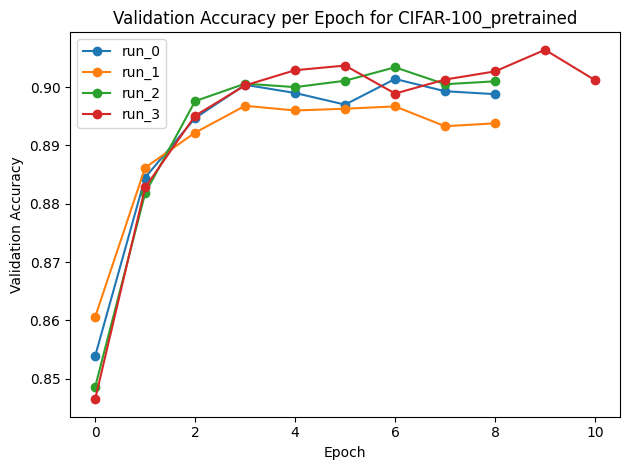

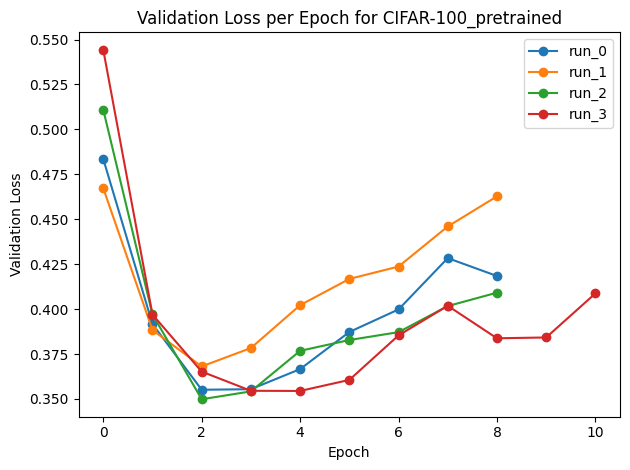

['hp_metric', 'loss/train_step', 'acc/train_step', 'epoch', 'loss/val_step', 'acc/val_step', 'loss/val_epoch', 'acc/val_epoch', 'loss/train_epoch', 'acc/train_epoch', 'loss/test_step', 'acc/test_step', 'loss/test_epoch', 'acc/test_epoch']
['hp_metric', 'loss/train_step', 'acc/train_step', 'epoch', 'loss/val_step', 'acc/val_step', 'loss/val_epoch', 'acc/val_epoch', 'loss/train_epoch', 'acc/train_epoch', 'loss/test_step', 'acc/test_step', 'loss/test_epoch', 'acc/test_epoch']
['hp_metric', 'loss/train_step', 'acc/train_step', 'epoch', 'loss/val_step', 'acc/val_step', 'loss/val_epoch', 'acc/val_epoch', 'loss/train_epoch', 'acc/train_epoch', 'loss/test_step', 'acc/test_step', 'loss/test_epoch', 'acc/test_epoch']
['hp_metric', 'loss/train_step', 'acc/train_step', 'epoch', 'loss/val_step', 'acc/val_step', 'loss/val_epoch', 'acc/val_epoch', 'loss/train_epoch', 'acc/train_epoch', 'loss/test_step', 'acc/test_step', 'loss/test_epoch', 'acc/test_epoch']


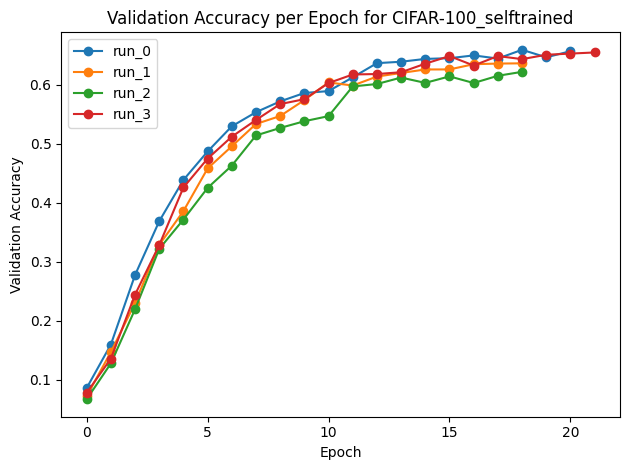

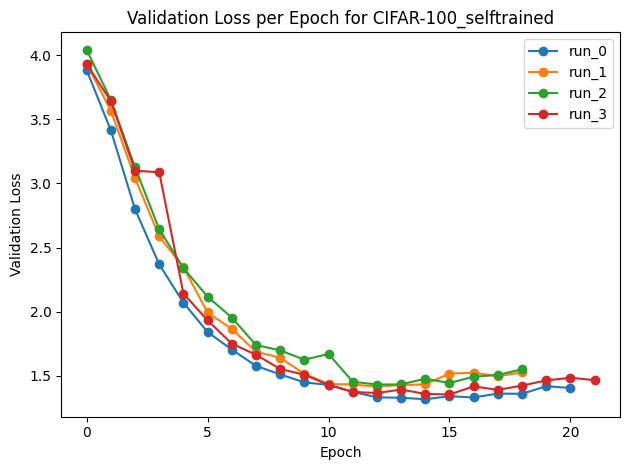

In [4]:
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import os
import re



""" This code loops over the lightning logs and plots one plot per dataset for validation accuracy per epoch
 and one plot per dataset for validation loss per epoch. """


log_dir = "lightning_logs_per_epoch"

sub_dir_1 = "lightning_logs_cats_pretrained_logs_2026-01-15_13:30:28"
sub_dir_2 = "lightning_logs_cats_selftrained_logs_2026-01-15_13:30:28"
sub_dir_3 = "lightning_logs_CIFAR-100_pretrained_logs_2026-01-15_13:30:28"
sub_dir_4 = "lightning_logs_CIFAR-100_selftrained_logs_2026-01-15_13:30:28"

dataset_dirs = [sub_dir_1, sub_dir_2, sub_dir_3, sub_dir_4]

for dataset_dir in dataset_dirs:
    # Create two figures per dataset_dir: one for accuracy, one for loss
    fig_acc, ax_acc = plt.subplots()
    fig_loss, ax_loss = plt.subplots()
    
    run_idx = 0
    full_log_dir = os.path.join(log_dir, dataset_dir)
    
    for sub_dir in os.walk(full_log_dir):
        if "version_" in sub_dir[0]:
            ea = event_accumulator.EventAccumulator(
                sub_dir[0],
                size_guidance={"scalars": 0},
            )
            ea.Reload()

            # List available scalar tags
            print(ea.Tags()["scalars"])

            # Read your metric for accuracy
            if len(ea.Tags()["scalars"]) != 0:
                acc_events = ea.Scalars("acc/val_epoch")
                loss_events = ea.Scalars("loss/val_epoch")
                
                # Plot accuracy
                epochs = [i for i in range(len(acc_events))]
                acc_values = [e.value for e in acc_events]
                ax_acc.plot(epochs, acc_values, marker="o", label=f"run_{run_idx}")
                
                # Plot loss
                loss_values = [e.value for e in loss_events]
                ax_loss.plot(epochs, loss_values, marker="o", label=f"run_{run_idx}")
                
                run_idx += 1
    
    # Finalize and show accuracy plot
    match = re.search(r"logs_(.*?)_logs", dataset_dir)
    ax_acc.set_xlabel("Epoch")
    ax_acc.set_ylabel("Validation Accuracy")
    ax_acc.set_title(f"Validation Accuracy per Epoch for {match.group(1)}")
    ax_acc.legend()
    fig_acc.tight_layout()
    
    # Finalize and show loss plot
    ax_loss.set_xlabel("Epoch")
    ax_loss.set_ylabel("Validation Loss")
    ax_loss.set_title(f"Validation Loss per Epoch for {match.group(1)}")
    ax_loss.legend()
    fig_loss.tight_layout()
    
    # Show both plots
    plt.show()

['hp_metric', 'loss/train_step', 'acc/train_step', 'epoch', 'loss/val_step', 'acc/val_step', 'loss/val_epoch', 'acc/val_epoch', 'loss/train_epoch', 'acc/train_epoch', 'loss/test_step', 'acc/test_step', 'loss/test_epoch', 'acc/test_epoch']
['hp_metric', 'loss/train_step', 'acc/train_step', 'epoch', 'loss/val_step', 'acc/val_step', 'loss/val_epoch', 'acc/val_epoch', 'loss/train_epoch', 'acc/train_epoch', 'loss/test_step', 'acc/test_step', 'loss/test_epoch', 'acc/test_epoch']
['hp_metric', 'loss/train_step', 'acc/train_step', 'epoch', 'loss/val_step', 'acc/val_step', 'loss/val_epoch', 'acc/val_epoch', 'loss/train_epoch', 'acc/train_epoch', 'loss/test_step', 'acc/test_step', 'loss/test_epoch', 'acc/test_epoch']
['hp_metric', 'loss/train_step', 'acc/train_step', 'epoch', 'loss/val_step', 'acc/val_step', 'loss/val_epoch', 'acc/val_epoch', 'loss/train_epoch', 'acc/train_epoch', 'loss/test_step', 'acc/test_step', 'loss/test_epoch', 'acc/test_epoch']
['hp_metric', 'loss/train_step', 'acc/train_

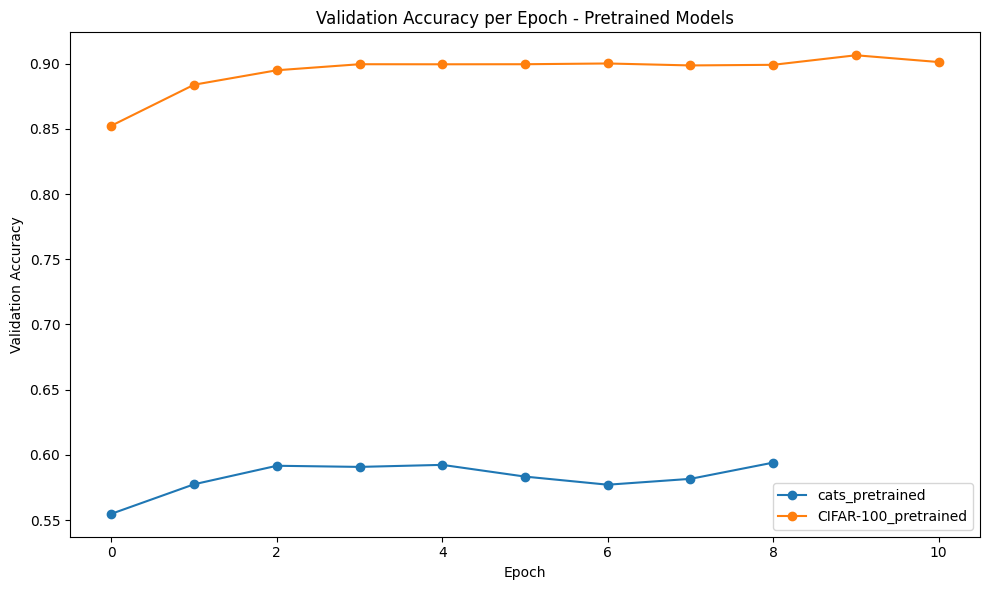

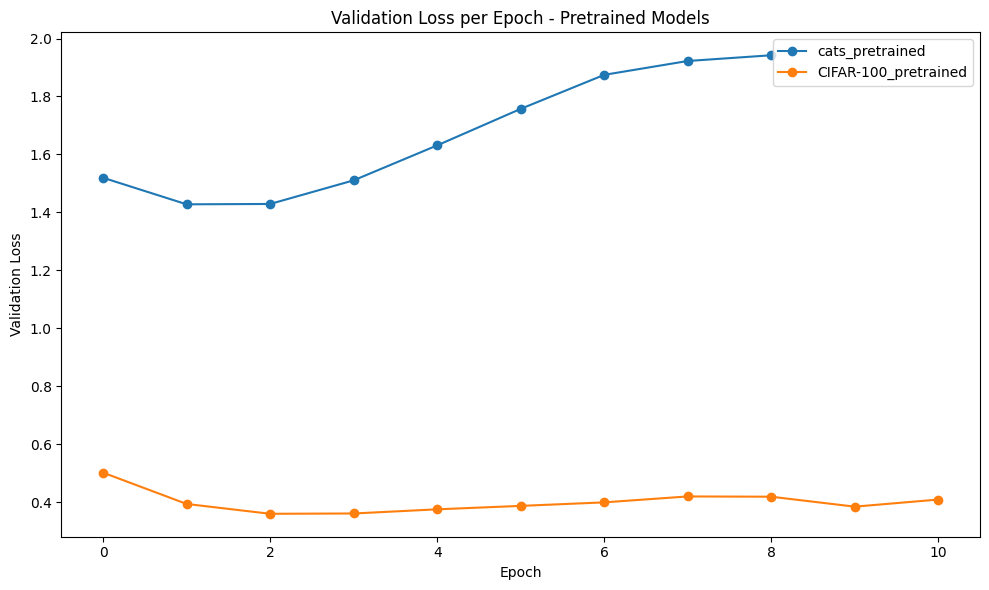

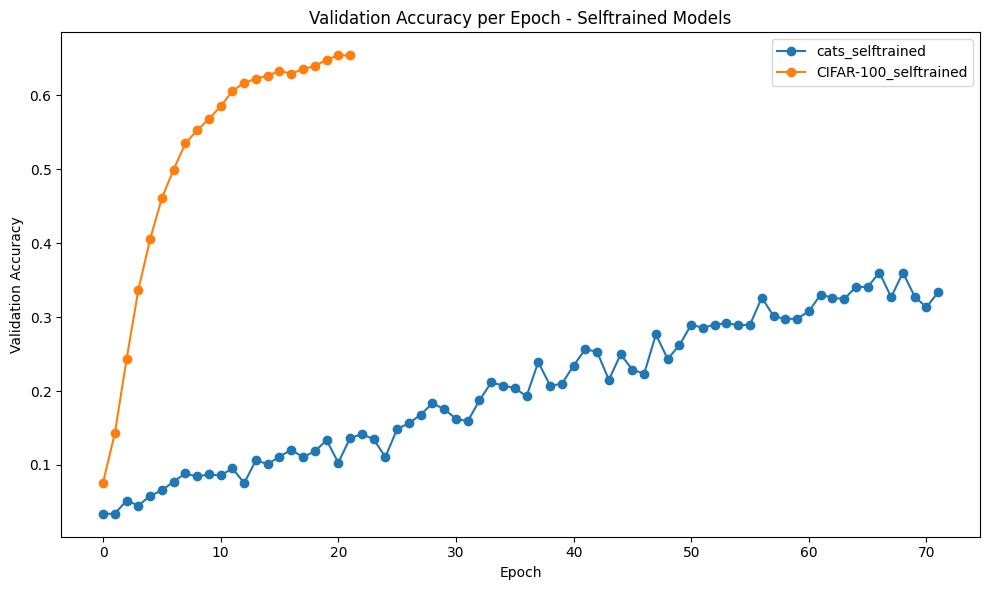

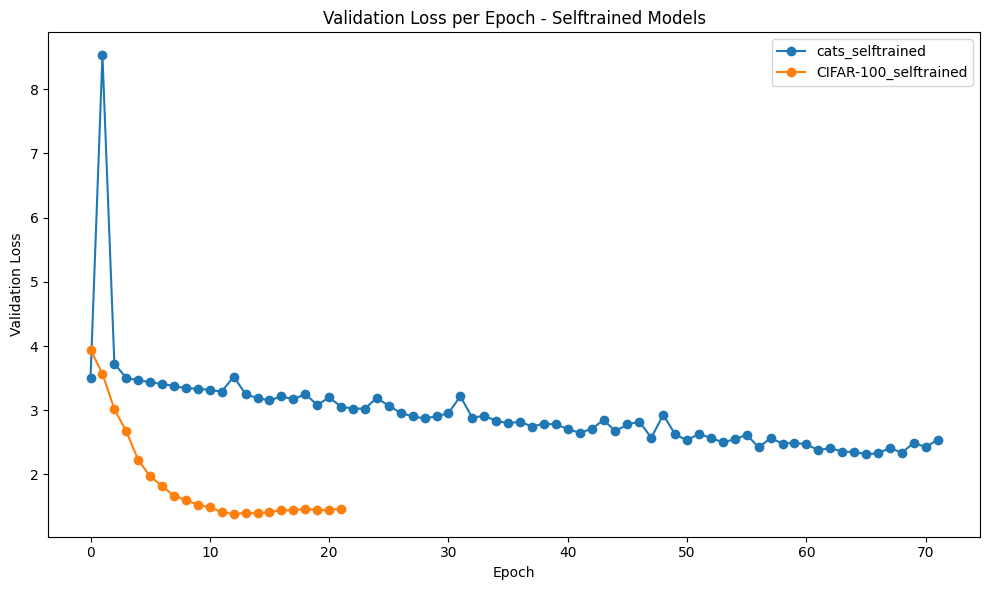

In [12]:
""" This code shows the validation accuracy per epoch for all pretrained models in one plot and for all selftrained models in another plot. 
Each line is the average of the runs per model. Same for loss."""

import numpy as np
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator
import os
import re

log_dir = "lightning_logs_per_epoch"

sub_dir_1 = "lightning_logs_cats_pretrained_logs_2026-01-15_13:30:28"
sub_dir_2 = "lightning_logs_cats_selftrained_logs_2026-01-15_13:30:28"
sub_dir_3 = "lightning_logs_CIFAR-100_pretrained_logs_2026-01-15_13:30:28"
sub_dir_4 = "lightning_logs_CIFAR-100_selftrained_logs_2026-01-15_13:30:28"

# Separate datasets into pretrained and selftrained
pretrained_dirs = [sub_dir_1, sub_dir_3]
selftrained_dirs = [sub_dir_2, sub_dir_4]

# Create 4 figures: 2 for pretrained (acc, loss), 2 for selftrained (acc, loss)
fig_pretrained_acc, ax_pretrained_acc = plt.subplots(figsize=(10, 6))
fig_pretrained_loss, ax_pretrained_loss = plt.subplots(figsize=(10, 6))
fig_selftrained_acc, ax_selftrained_acc = plt.subplots(figsize=(10, 6))
fig_selftrained_loss, ax_selftrained_loss = plt.subplots(figsize=(10, 6))

def process_datasets(dataset_dirs, ax_acc, ax_loss, model_type):
    """Process datasets and plot their averages on the provided axes"""
    for dataset_dir in dataset_dirs:
        run_idx = 0
        full_log_dir = os.path.join(log_dir, dataset_dir)
        
        all_acc_values = []
        all_loss_values = []
        
        for sub_dir in os.walk(full_log_dir):
            if "version_" in sub_dir[0]:
                ea = event_accumulator.EventAccumulator(
                    sub_dir[0],
                    size_guidance={"scalars": 0},
                )
                ea.Reload()

                # List available scalar tags
                print(ea.Tags()["scalars"])

                # Read your metric for accuracy
                if len(ea.Tags()["scalars"]) != 0:
                    acc_events = ea.Scalars("acc/val_epoch")
                    loss_events = ea.Scalars("loss/val_epoch")
                    
                    # Collect accuracy and loss values
                    acc_values = [e.value for e in acc_events]
                    loss_values = [e.value for e in loss_events]
                    
                    all_acc_values.append(acc_values)
                    all_loss_values.append(loss_values)
                    
                    run_idx += 1
        
        if all_acc_values:  # Only process if we have data
            # Find max length and pad arrays
            max_len = max(len(acc) for acc in all_acc_values)
            padded_acc_values = [acc + [np.nan] * (max_len - len(acc)) for acc in all_acc_values]
            padded_loss_values = [loss + [np.nan] * (max_len - len(loss)) for loss in all_loss_values]
            
            # Compute average accuracy and loss across runs (ignoring NaN values)
            avg_acc_values = np.nanmean(padded_acc_values, axis=0)
            avg_loss_values = np.nanmean(padded_loss_values, axis=0)
            
            # Extract dataset name
            match = re.search(r"logs_(.*?)_logs", dataset_dir)
            dataset_name = match.group(1) if match else dataset_dir
            
            # Plot average accuracy
            epochs = [i for i in range(len(avg_acc_values))]
            ax_acc.plot(epochs, avg_acc_values, marker="o", label=dataset_name)
            
            # Plot average loss
            ax_loss.plot(epochs, avg_loss_values, marker="o", label=dataset_name)

# Process pretrained datasets
process_datasets(pretrained_dirs, ax_pretrained_acc, ax_pretrained_loss, "Pretrained")

# Process selftrained datasets
process_datasets(selftrained_dirs, ax_selftrained_acc, ax_selftrained_loss, "Selftrained")

# Finalize pretrained accuracy plot
ax_pretrained_acc.set_xlabel("Epoch")
ax_pretrained_acc.set_ylabel("Validation Accuracy")
ax_pretrained_acc.set_title("Validation Accuracy per Epoch - Pretrained Models")
ax_pretrained_acc.legend()
fig_pretrained_acc.tight_layout()

# Finalize pretrained loss plot
ax_pretrained_loss.set_xlabel("Epoch")
ax_pretrained_loss.set_ylabel("Validation Loss")
ax_pretrained_loss.set_title("Validation Loss per Epoch - Pretrained Models")
ax_pretrained_loss.legend()
fig_pretrained_loss.tight_layout()

# Finalize selftrained accuracy plot
ax_selftrained_acc.set_xlabel("Epoch")
ax_selftrained_acc.set_ylabel("Validation Accuracy")
ax_selftrained_acc.set_title("Validation Accuracy per Epoch - Selftrained Models")
ax_selftrained_acc.legend()
fig_selftrained_acc.tight_layout()

# Finalize selftrained loss plot
ax_selftrained_loss.set_xlabel("Epoch")
ax_selftrained_loss.set_ylabel("Validation Loss")
ax_selftrained_loss.set_title("Validation Loss per Epoch - Selftrained Models")
ax_selftrained_loss.legend()
fig_selftrained_loss.tight_layout()

plt.show()

['hp_metric', 'loss/train_step', 'acc/train_step', 'epoch', 'loss/val_step', 'acc/val_step', 'loss/val_epoch', 'acc/val_epoch', 'loss/train_epoch', 'acc/train_epoch', 'loss/test_step', 'acc/test_step', 'loss/test_epoch', 'acc/test_epoch']
['hp_metric', 'loss/train_step', 'acc/train_step', 'epoch', 'loss/val_step', 'acc/val_step', 'loss/val_epoch', 'acc/val_epoch', 'loss/train_epoch', 'acc/train_epoch', 'loss/test_step', 'acc/test_step', 'loss/test_epoch', 'acc/test_epoch']
['hp_metric', 'loss/train_step', 'acc/train_step', 'epoch', 'loss/val_step', 'acc/val_step', 'loss/val_epoch', 'acc/val_epoch', 'loss/train_epoch', 'acc/train_epoch', 'loss/test_step', 'acc/test_step', 'loss/test_epoch', 'acc/test_epoch']
['hp_metric', 'loss/train_step', 'acc/train_step', 'epoch', 'loss/val_step', 'acc/val_step', 'loss/val_epoch', 'acc/val_epoch', 'loss/train_epoch', 'acc/train_epoch', 'loss/test_step', 'acc/test_step', 'loss/test_epoch', 'acc/test_epoch']
['hp_metric', 'loss/train_step', 'acc/train_

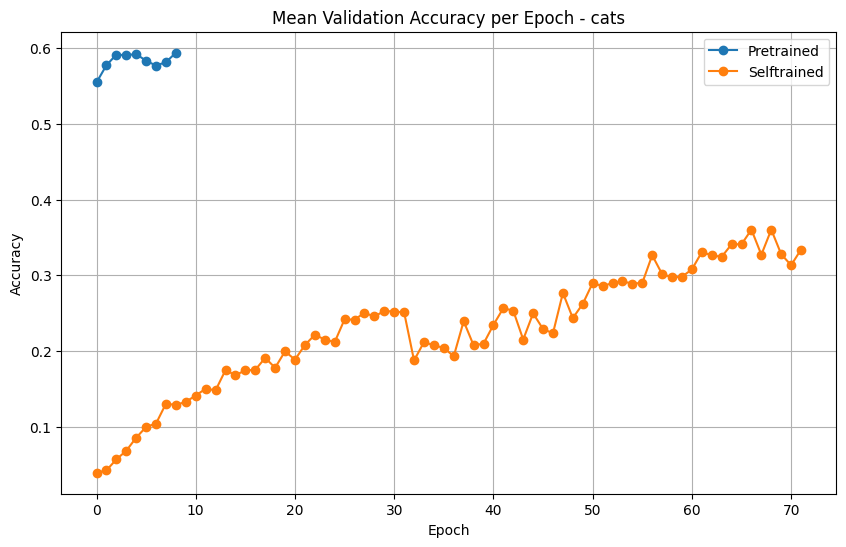

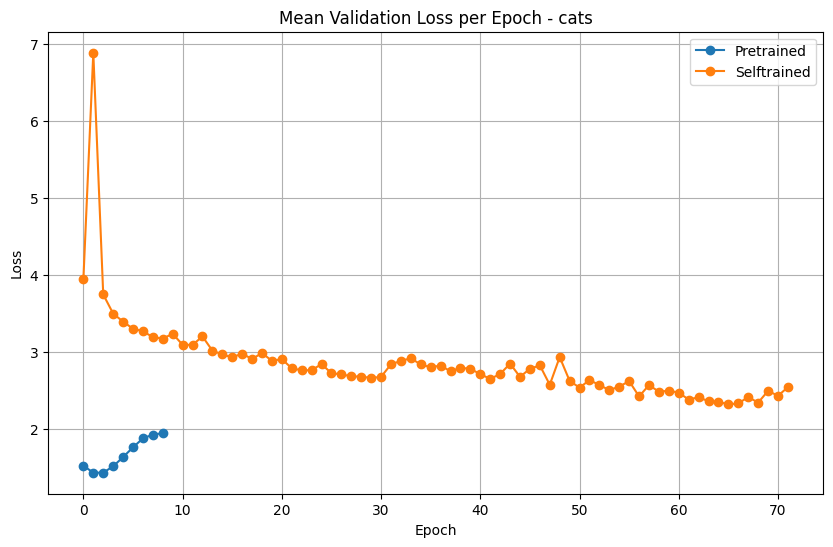

['hp_metric', 'loss/train_step', 'acc/train_step', 'epoch', 'loss/val_step', 'acc/val_step', 'loss/val_epoch', 'acc/val_epoch', 'loss/train_epoch', 'acc/train_epoch', 'loss/test_step', 'acc/test_step', 'loss/test_epoch', 'acc/test_epoch']
['hp_metric', 'loss/train_step', 'acc/train_step', 'epoch', 'loss/val_step', 'acc/val_step', 'loss/val_epoch', 'acc/val_epoch', 'loss/train_epoch', 'acc/train_epoch', 'loss/test_step', 'acc/test_step', 'loss/test_epoch', 'acc/test_epoch']
['hp_metric', 'loss/train_step', 'acc/train_step', 'epoch', 'loss/val_step', 'acc/val_step', 'loss/val_epoch', 'acc/val_epoch', 'loss/train_epoch', 'acc/train_epoch', 'loss/test_step', 'acc/test_step', 'loss/test_epoch', 'acc/test_epoch']
['hp_metric', 'loss/train_step', 'acc/train_step', 'epoch', 'loss/val_step', 'acc/val_step', 'loss/val_epoch', 'acc/val_epoch', 'loss/train_epoch', 'acc/train_epoch', 'loss/test_step', 'acc/test_step', 'loss/test_epoch', 'acc/test_epoch']
['hp_metric', 'loss/train_step', 'acc/train_

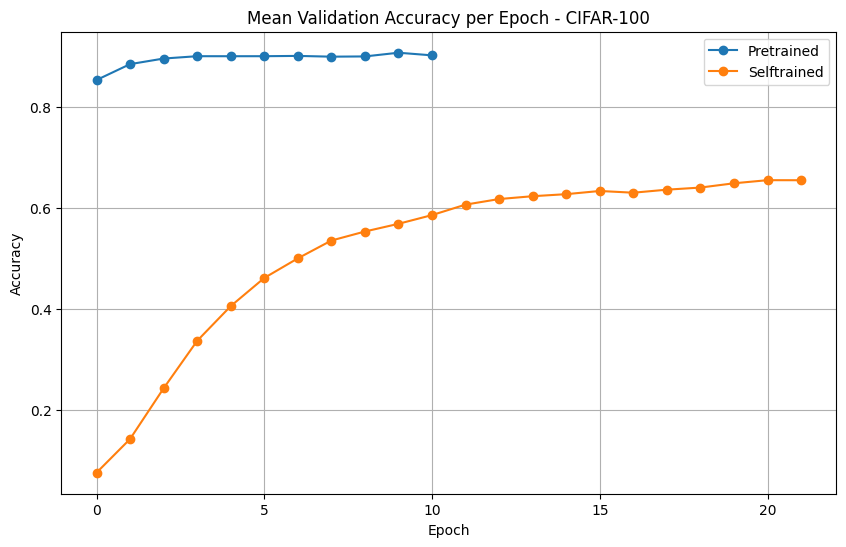

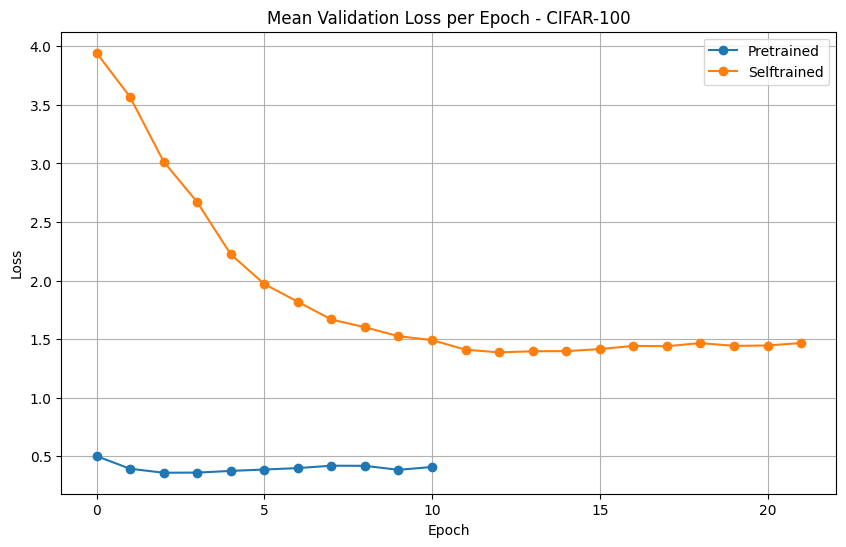

In [6]:
"""This code is supposed to plot the mean validation accuracy per epoch and mean validation loss per epoch per dataset with selftrained and pretrained in the same plot."""

import numpy as np
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator
import os
import re

log_dir = "lightning_logs_per_epoch"
sub_dir_1 = "lightning_logs_cats_pretrained_logs_2026-01-15_13:30:28"
sub_dir_2 = "lightning_logs_cats_selftrained_logs_2026-01-15_13:30:28"
sub_dir_3 = "lightning_logs_CIFAR-100_pretrained_logs_2026-01-15_13:30:28"
sub_dir_4 = "lightning_logs_CIFAR-100_selftrained_logs_2026-01-15_13:30:28"
cats_dirs = [sub_dir_1, sub_dir_2]
cifar_dirs = [sub_dir_3, sub_dir_4]

datasets = {"cats": cats_dirs, "CIFAR-100": cifar_dirs}

for dataset_name, dataset_dirs in datasets.items():
    fig_acc, ax_acc = plt.subplots(figsize=(10, 6))
    fig_loss, ax_loss = plt.subplots(figsize=(10, 6))
    
    for dataset_dir in dataset_dirs:
        run_idx = 0
        full_log_dir = os.path.join(log_dir, dataset_dir)
        
        all_acc_values = []
        all_loss_values = []
        
        for sub_dir in os.walk(full_log_dir):
            if "version_" in sub_dir[0]:
                ea = event_accumulator.EventAccumulator(
                    sub_dir[0],
                    size_guidance={"scalars": 0},
                )
                ea.Reload()

                # List available scalar tags
                print(ea.Tags()["scalars"])

                # Read your metric for accuracy
                if len(ea.Tags()["scalars"]) != 0:
                    acc_events = ea.Scalars("acc/val_epoch")
                    loss_events = ea.Scalars("loss/val_epoch")
                    
                    # Collect accuracy and loss values
                    acc_values = [e.value for e in acc_events]
                    loss_values = [e.value for e in loss_events]
                    
                    all_acc_values.append(acc_values)
                    all_loss_values.append(loss_values)
                    
                    run_idx += 1
        
        if all_acc_values:  # Only process if we have data
            # Find max length and pad arrays
            max_len = max(len(acc) for acc in all_acc_values)
            padded_acc_values = [acc + [np.nan] * (max_len - len(acc)) for acc in all_acc_values]
            padded_loss_values = [loss + [np.nan] * (max_len - len(loss)) for loss in all_loss_values]
            
            # Compute average accuracy and loss across runs (ignoring NaN values)
            avg_acc_values = np.nanmean(padded_acc_values, axis=0)
            avg_loss_values = np.nanmean(padded_loss_values, axis=0)
            
            # Determine model type from directory name
            model_type = "Pretrained" if "pretrained" in dataset_dir else "Selftrained"
            
            # Plot average accuracy
            epochs = [i for i in range(len(avg_acc_values))]
            ax_acc.plot(epochs, avg_acc_values, marker="o", label=model_type)
            
            # Plot average loss
            ax_loss.plot(epochs, avg_loss_values, marker="o", label=model_type)

    ax_acc.set_title(f"Mean Validation Accuracy per Epoch - {dataset_name}")
    ax_acc.set_xlabel("Epoch")
    ax_acc.set_ylabel("Accuracy")
    ax_acc.legend()
    ax_acc.grid(True)

    ax_loss.set_title(f"Mean Validation Loss per Epoch - {dataset_name}")
    ax_loss.set_xlabel("Epoch")
    ax_loss.set_ylabel("Loss")
    ax_loss.legend()
    ax_loss.grid(True)

    plt.show()